# U.S. Wind Turbine Database Exploration and Analysis

This is a freelance project I am working on for [decarbonfuse](https://decarbonfuse.com/). I am exploring the [United States Wind Turbine Database (USWTDB)](https://eerscmap.usgs.gov/uswtdb/), which provides the locations of land-based and offshore wind turbines in the United States, corresponding wind project information, and turbine technical specifications.

The project objective is to explore and interpret wind data with an end goal of including charts and analysis in white paper and online discovery tool.  

## Navigating the API

Retrieval of turbine data from the [USWTDB API](https://eerscmap.usgs.gov/uswtdb/api-doc/) requires a standard GET request. No token is required for data retrieval.

base path: `https://eersc.usgs.gov/api/uswtdb/v1/`

API response is returned as JSON data 

### Key/Value Codes
|Key|Value Type|Key Description|
| --- | --- | --- |
|case_id|number (integer)|Unique stable identification number.|
|faa_ors|string|Unique identifier for cross-reference to the Federal Aviation Administration (FAA) digital obstacle files.|
|faa_asn|string|Unique identifier for cross-reference to the FAA obstruction evaluation airport airspace analysis dataset.|
|usgs_pr_id|number (integer)|Unique identifier for cross-reference to the 2014 USGS turbine dataset.|
|t_state|string|State where turbine is located.|
|t_county|string|County where turbine is located.|
|t_fips|string|State and county fips where turbine is located, based on spatial join of turbine points with US state and county.|
|p_name|string|Name of the wind power project that the turbine is a part of. <br>Project names are typically provided by the developer; some names are identified via other internet resources, and others are created by the authors to differentiate them from previous projects. <br>Values are that were unknown were assigned a name based on the county where the turbine is located.|
|p_year|number (integer)|Year that the turbine became operational and began providing power. Note this may differ from the year that construction began.|
|p_tnum|number (integer)|Number of turbines in the wind power project.|
|p_cap|number (float)|Cumulative capacity of all turbines in the wind power project in megawatts (MW).|
|t_manu|string|Turbine manufacturer - name of the original equipment manufacturer of the turbine.|
|t_model|string|Turbine model - manufacturer's model name of each turbine.|
|t_cap|number (integer)|Turbine rated capacity - stated output power at rated wind speed from manufacturer, ACP, and/or internet resources in kilowatts (kW).|
|t_hh|number (float)|Turbine hub height in meters (m).|
|t_rd|number (float)|Turbine rotor diameter in meters (m).|
|t_rsa|number (float)|Turbine rotor swept area in square meters (m2).|
|t_ttlh|number (float)|Turbine total height from ground to tip of a blade at its apex in meters (m).|
|retrofit|number (integer)|Indicator of whether the turbine has been partially retrofit after initial construction (e.g., rotor and/or nacelle replacement). 0 indicates no known retrofit. 1 indicates yes known retrofit.|
|retrofit_year|number (integer)|Year in which the turbine was partially retrofit.|
|t_conf_atr|number (integer)|Level of confidence in the turbine attributes.  <br>1—No confidence: no attribute data beyond total height and year, 2—Partial confidence: incomplete information or substantial conflict between, <br>3—Full confidence: complete information, consistent across multiple data sources.|
|t_conf_loc|number (integer)|Level of confidence in turbine location.  <br>1— No turbine shown in image; image has clouds; imagery older than turbine built date, 2— Partial confidence: image shows a developed pad with concrete base and/or turbine parts on the ground, <br>3— Full confidence: image shows an installed turbine.|
|t_img_date|number (integer)|Date of image used to visually verify turbine location. Note if source of image is NAIP, the month and day were set to 01/01.|
|t_img_srce|string|Source of image used to visually verify turbine location.|
|xlong|number (float)|Longitude of the turbine point, in decimal degrees.|
|ylat|number (float)|Latitude of the turbine point, in decimal degrees.|
|eia_id|number (integer)|Plant ID from Energy Information Administration (EIA).|

## Imports

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

### Data Retrieval

*Code is inactivated for now because the data have already been retrieved

In [4]:
#import requests #Use requests library to send a GET request.

In [5]:
#res = requests.get('https://eersc.usgs.gov/api/uswtdb/v1/turbines') #All turbine data.


In [6]:
#res

Status code 200 = the request has succeeded

In [7]:
#j = res.json() #Outputs a Python dictionary version of the JSON response.
#df = pd.DataFrame.from_dict(j) #Construct DataFrame from JSON dict.

**Loading saved CSV file from retrieved data. Note that there are two additional engineered columns (`MercatorX` `MercatorY`, see next section) that were saved to the dataframe.**

In [8]:
#Load CSV file as df
df=pd.read_csv('all_turbine_data')

In [9]:
df

,Unnamed: 0,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,...,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,eia_id,retrofit,retrofit_year,MercatorX,MercatorY
0,0,3072695,NaN,NaN,5143.0,CA,Kern County,6029,251 Wind,1987.0,...,3,5/8/2018,Digital Globe,-118.36441,35.07744,52161.0,0,NaN,-1.317627e+07,4.174410e+06
1,1,3072704,NaN,NaN,5146.0,CA,Kern County,6029,251 Wind,1987.0,...,3,5/8/2018,Digital Globe,-118.36420,35.07764,52161.0,0,NaN,-1.317624e+07,4.174437e+06
2,2,3072661,NaN,NaN,5149.0,CA,Kern County,6029,251 Wind,1987.0,...,3,5/8/2018,Digital Globe,-118.36376,35.07791,52161.0,0,NaN,-1.317619e+07,4.174474e+06
3,3,3063269,19-028130,2016-WTE-5934-OE,NaN,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,...,3,7/23/2017,Digital Globe,-93.63284,41.88248,NaN,0,NaN,-1.042316e+07,5.143392e+06
4,4,3063321,19-028135,2014-WTE-4087-OE,NaN,IA,Hardin County,19083,30 MW Iowa DG Portfolio,2017.0,...,3,6/20/2017,Digital Globe,-93.36780,42.49794,NaN,0,NaN,-1.039366e+07,5.235863e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71661,71661,3053232,36-120351,2015-WTE-5788-OE,NaN,NY,Wyoming County,36121,unknown Wyoming County,2016.0,...,3,5/20/2017,Digital Globe,-78.18794,42.74082,NaN,0,NaN,-8.703842e+06,5.272605e+06
71662,71662,3101958,48-171972,2020-WTW-2021-OE,NaN,TX,Young County,48503,unknown Young County,NaN,...,1,8/2/2020,Digital Globe,-98.90760,33.14941,NaN,0,NaN,-1.101034e+07,3.915152e+06
71663,71663,3040944,48-024978,2011-WTW-352-OE,41364.0,TX,Young County,48503,unknown Young County 1,2011.0,...,3,7/16/2018,Digital Globe,-98.55109,33.09329,NaN,0,NaN,-1.097066e+07,3.907693e+06
71664,71664,3055918,08-072237,2015-WTW-9995-OE,NaN,CO,Yuma County,8125,unknown Yuma County,2016.0,...,3,5/17/2017,Digital Globe,-102.71695,40.03755,NaN,0,NaN,-1.143440e+07,4.871400e+06


## Data Exploration

Not all of the data are equally reliable, we can deal with this later on. For now let's just get a general idea of the data trends.

C:\Users\18053\anaconda3\envs\CareerTransition\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

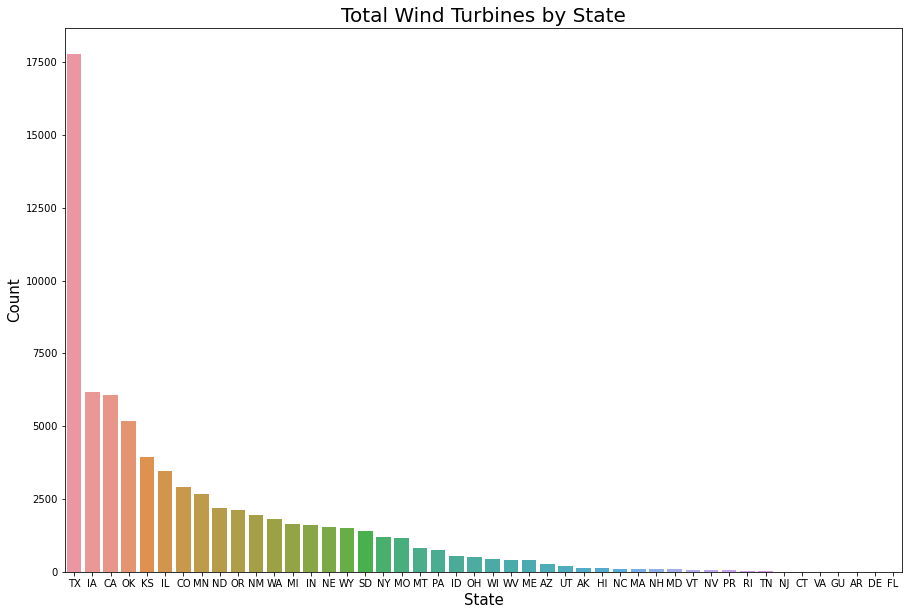

In [10]:
plt.figure(figsize=(15,10))
plt.title('Total Wind Turbines by State', fontsize=20) 
sns.countplot(df['t_state'], order = df['t_state'].value_counts().index) #Use value_counts() to set the order as descending.
plt.xlabel('State', fontsize=15) 
plt.ylabel('Count', fontsize=15)

In [11]:
state_df=df.groupby('t_state').sum()
#state_df['t_cap'].sort_values()

Text(0, 0.5, 'Turbine Capacity (kW)')

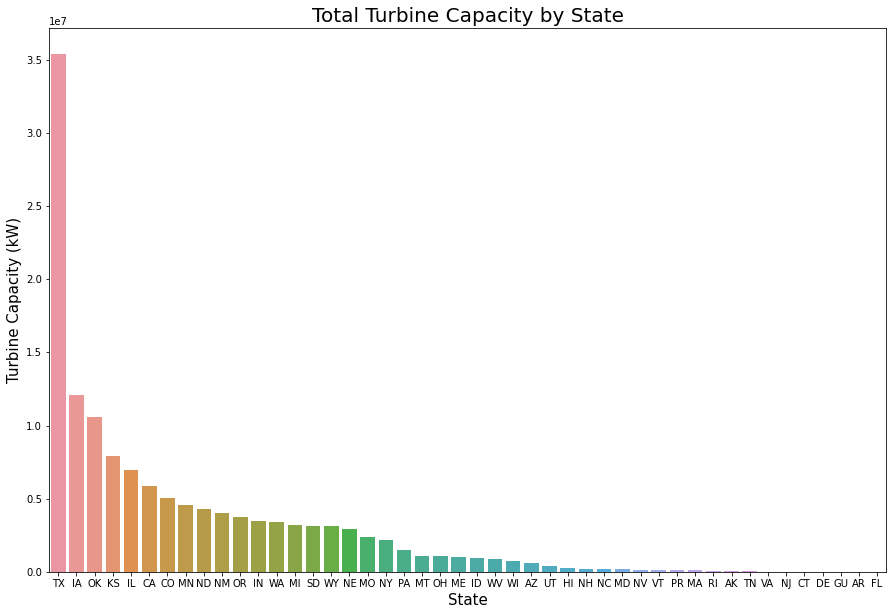

In [12]:
plt.figure(figsize=(15,10))
plt.title('Total Turbine Capacity by State', fontsize=20) 
sns.barplot(x=state_df['t_cap'].index, y=state_df['t_cap'].values, order= state_df['t_cap'].sort_values(ascending=False).index) 
plt.xlabel('State', fontsize=15) 
plt.ylabel('Turbine Capacity (kW)', fontsize=15)

In [13]:
state_summary_df = pd.DataFrame(index= state_df.index, columns=['Number of Turbines', 'Turbine Capacity (kW)'])

In [14]:
state_summary_df['Number of Turbines']=df['t_state'].value_counts() #Sum of all turbines per state.
state_summary_df['Turbine Capacity (kW)'] = state_df['t_cap'] #Sum of turbine capacity per state.
state_summary_df.index.rename('State', inplace=True)

In [15]:
state_summary_df['Number of Turbines Rank']= state_summary_df['Number of Turbines'].rank(ascending=False) #Add column ranking states by number of turbines so we can compare nukmber of turbines vs. the state capacity
state_summary_df.sort_values('Turbine Capacity (kW)', ascending=False)

,Number of Turbines,Turbine Capacity (kW),Number of Turbines Rank
State,,,
TX,17779,35410064.0,1.0
IA,6173,12119432.0,2.0
OK,5177,10595965.0,4.0
KS,3959,7937420.0,5.0
IL,3461,6951808.0,6.0
CA,6088,5888096.0,3.0
CO,2905,5076090.0,7.0
MN,2688,4537105.0,8.0
ND,2194,4268080.0,9.0


Of note, California has the 3rd highest number of turbines but is 6th in capacity.

#### Turbine State Scatter Map using bokeh
bokeh only accepts web Mercator projection data so latitude and longitude values need to be converted to web Mercator system. Using `pyproj` library for this. 

Using Bokeh to visualize the distribution of wind turbines

In [33]:
from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, WIKIMEDIA, CARTODBPOSITRON, STAMEN_TERRAIN, STAMEN_TONER, ESRI_IMAGERY, OSM
from bokeh.io import output_notebook, show
from pyproj import Proj, transform

output_notebook()

Loading BokehJS ...

In [34]:
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')

C:\Users\18053\anaconda3\envs\CareerTransition\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\18053\anaconda3\envs\CareerTransition\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Converting turbine locations data present in latitude and longitude to web Mercator projection data. Setting that mapped data into the df, these data will be used for plotting circles on top of the US Map. 

Note: Code is inactivated for now because the saved dataframe already has the mercator coordinates, this shows how they were engineered in.

In [35]:
#lons, lats = [], []
#for lon, lat in tqdm(list(zip(df['xlong'], df['ylat']))):
    #x, y = transform(outProj,inProj,lon,lat)
    #lons.append(x)
    #lats.append(y)

In [36]:
#df["MercatorX"] = lons
#df["MercatorY"] = lats

In [37]:
df.head()

,Unnamed: 0,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,...,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,eia_id,retrofit,retrofit_year,MercatorX,MercatorY
0,0,3072695,NaN,NaN,5143.0,CA,Kern County,6029,251 Wind,1987.0,...,3,5/8/2018,Digital Globe,-118.36441,35.07744,52161.0,0,NaN,-1.317627e+07,4.174410e+06
1,1,3072704,NaN,NaN,5146.0,CA,Kern County,6029,251 Wind,1987.0,...,3,5/8/2018,Digital Globe,-118.36420,35.07764,52161.0,0,NaN,-1.317624e+07,4.174437e+06
2,2,3072661,NaN,NaN,5149.0,CA,Kern County,6029,251 Wind,1987.0,...,3,5/8/2018,Digital Globe,-118.36376,35.07791,52161.0,0,NaN,-1.317619e+07,4.174474e+06
3,3,3063269,19-028130,2016-WTE-5934-OE,NaN,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,...,3,7/23/2017,Digital Globe,-93.63284,41.88248,NaN,0,NaN,-1.042316e+07,5.143392e+06
4,4,3063321,19-028135,2014-WTE-4087-OE,NaN,IA,Hardin County,19083,30 MW Iowa DG Portfolio,2017.0,...,3,6/20/2017,Digital Globe,-93.36780,42.49794,NaN,0,NaN,-1.039366e+07,5.235863e+06


This is the point where the dataframe was saved.

In [38]:
#Save a CSV file of the requested data + web Mercator projection data
#df.to_csv('all_turbine_data')

**bokeh plots**

In [62]:
#Load tile from the list of tile providers available from bokeh.tile_providers.
from bokeh.tile_providers import get_provider
wikimedia = get_provider(WIKIMEDIA)

us_lon1, us_lat1 = transform(outProj,inProj,-140,10)
us_lon2, us_lat2 = transform(outProj,inProj,-50,55)

#Create a figure with x and y-axis type as Mercator.
p = figure(plot_width=900, plot_height=700,
           x_range=(us_lon1, us_lon2), y_range=(us_lat1, us_lat2),
           x_axis_type="mercator", y_axis_type="mercator",
           tooltips=[
                    ("State", "@t_state	"), ("Year", "@p_year"), ("Manufacturer", "@t_manu"), ("ID", "@case_id")
                    ],
          title="Turbine Scatter Map")

#Add loaded tile to figure.
p.add_tile(wikimedia)

p.circle(x="MercatorX", y="MercatorY",
         size=2,
         fill_color="dodgerblue", line_color="dodgerblue",
         fill_alpha=0.3,
         source=df)
           


#show(p) #activate in Ipython kernel to view plot- unable to display on GitHub

C:\Users\18053\AppData\Local\Temp\ipykernel_22112\1095095109.py:5: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  us_lon1, us_lat1 = transform(outProj,inProj,-140,10)
C:\Users\18053\AppData\Local\Temp\ipykernel_22112\1095095109.py:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  us_lon2, us_lat2 = transform(outProj,inProj,-50,55)


GlyphRenderer(id='1693', ...)

#### United States Turbine Choropleth Maps
A chloropleth map will color code states of the US according to the count of some variable in that state.

US state boundary data which is in bokeh as a part of `bokeh.sampledata.us_states`. Boundary data will be loaded as a pandas dataframe so that each state’s boundary has latitude and longitude data that can be used to create a polygon consisting of the state. The `state_summary_df` data will be joined with the state boundary data.

Finally, a single dictionary consisting of this data will be used as a source for the map.

In [40]:
from bokeh.models import LinearColorMapper
from bokeh.palettes import Oranges256 as oranges
from bokeh.sampledata.us_states import data as us_states

In [41]:
us_states_df = pd.DataFrame(us_states).T #Transpose DataFrame so each row is a state.
us_states_df = us_states_df[~us_states_df["name"].isin(['Alaska', "Hawaii"])] #Leaving Alaska and Hawaii off the map for scaling purposes.
us_states_df["lons"] = us_states_df.lons.values.tolist() #Boundary coordinates.
us_states_df["lats"] = us_states_df.lats.values.tolist()
us_states_df = us_states_df.join(state_summary_df["Number of Turbines"]) #Add number of turbines/state.
us_states_df.head()

,name,region,lats,lons,Number of Turbines
NV,Nevada,Southwest,"[40.68928, 40.4958, 40.30302, 40.09896, 39.999...","[-114.04392, -114.04558, -114.04619, -114.0464...",68.0
AZ,Arizona,Southwest,"[34.87057, 35.00186, 35.00332, 35.07971, 35.11...","[-114.63332, -114.63349, -114.63423, -114.6089...",270.0
WI,Wisconsin,Central,"[42.49273, 42.49433, 42.49562, 42.49561, 42.49...","[-87.8156, -87.93137, -88.10268, -88.20645, -8...",451.0
GA,Georgia,Southeast,"[32.29667, 32.24425, 32.09197, 32.03256, 32.02...","[-81.12387, -81.15654, -81.02071, -80.75203, -...",NaN
KS,Kansas,Central,"[36.99927, 36.99879, 36.99914, 36.99903, 36.99...","[-96.28415, -96.55381, -96.91244, -97.1197, -9...",3959.0


In [42]:
us_states_datasource = {}
us_states_datasource["lons"] = us_states_df['lons'].values.tolist()
us_states_datasource["lats"] = us_states_df['lats'].values.tolist()
us_states_datasource["name"] = us_states_df['name'].values.tolist()
us_states_datasource["StateCodes"] = us_states_df.index.values.tolist()
us_states_datasource["Number of Turbines"] = us_states_df['Number of Turbines'].values.tolist()
us_states_datasource["Region"] = us_states_df['region'].values.tolist()

In [66]:
fig = figure(plot_width=900, plot_height=600,
             title="United States Turbine Count Per State Choropleth Map",
             x_axis_location=None, y_axis_location=None,
             tooltips=[
                        ("Name", "@name"), ("Number of Turbines", "@{Number of Turbines}"), ("Region", "@Region")
                      ])

fig.grid.grid_line_color = None
fig.patches("lons", "lats", source=us_states_datasource,
            fill_color={'field': 'Number of Turbines', 'transform': LinearColorMapper (palette=oranges[::-1])}, #LinearColorMapper maps the count of turbines/state to a particular color in the selected palette.
            line_color="black", line_width=0.5)

#show(fig) #activate in Ipython kernel to view plot- unable to display on GitHub

GlyphRenderer(id='2077', ...)

We can generate a similar map for capacity by state.

In [44]:
us_states_df['Capacity']=state_summary_df['Turbine Capacity (kW)']

In [45]:
us_states_df.head()

,name,region,lats,lons,Number of Turbines,Capacity
NV,Nevada,Southwest,"[40.68928, 40.4958, 40.30302, 40.09896, 39.999...","[-114.04392, -114.04558, -114.04619, -114.0464...",68.0,151800.0
AZ,Arizona,Southwest,"[34.87057, 35.00186, 35.00332, 35.07971, 35.11...","[-114.63332, -114.63349, -114.63423, -114.6089...",270.0,615300.0
WI,Wisconsin,Central,"[42.49273, 42.49433, 42.49562, 42.49561, 42.49...","[-87.8156, -87.93137, -88.10268, -88.20645, -8...",451.0,735370.0
GA,Georgia,Southeast,"[32.29667, 32.24425, 32.09197, 32.03256, 32.02...","[-81.12387, -81.15654, -81.02071, -80.75203, -...",NaN,NaN
KS,Kansas,Central,"[36.99927, 36.99879, 36.99914, 36.99903, 36.99...","[-96.28415, -96.55381, -96.91244, -97.1197, -9...",3959.0,7937420.0


In [46]:
us_states_datasource['Capacity'] = us_states_df['Capacity'].values.tolist()

In [64]:
fig = figure(plot_width=900, plot_height=600,
             title="United States Turbine Capacity Per State Choropleth Map",
             x_axis_location=None, y_axis_location=None,
             tooltips=[
                        ("Name", "@name"), ("Capacity", "@Capacity"), ("Region", "@Region")
                      ])

fig.grid.grid_line_color = None

fig.patches("lons", "lats", source=us_states_datasource,
            fill_color={'field': 'Capacity', 'transform': LinearColorMapper(palette=oranges[::-1])}, #LogColorMapper maps the total capacity to a particular color in the selected palette.
           line_color="black", line_width=0.5)

fig.legend.location = "bottom_right"


#show(fig) #activate in Ipython kernel to view plot- unable to display on GitHub

In [48]:
df_bymanu= df.groupby('t_manu').count()
df_bymanu = df_bymanu.reset_index()
df_bymanu.head()

,t_manu,Unnamed: 0,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,...,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,eia_id,retrofit,retrofit_year,MercatorX,MercatorY
0,AAER,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,1,3,0,3,3
1,AOC,12,12,6,6,10,12,12,12,12,...,12,12,12,12,12,8,12,0,12,12
2,AWE,2,2,2,2,2,2,2,2,2,...,2,1,2,2,2,0,2,0,2,2
3,Acciona,758,758,758,758,601,758,758,758,758,...,758,558,758,758,758,758,758,0,758,758
4,Aeronautica,5,5,4,4,4,5,5,5,5,...,5,4,5,5,5,0,5,0,5,5


In [49]:
#Preparing dataframe for a pie chart by combining companies with a small number of turbines 
df_bymanu_piechart= df_bymanu[['t_manu', 'case_id']] #case_id is the number  of wind turbines that company has in the data

In [50]:
len(df_bymanu_piechart['case_id'])

63

In [51]:
len(df_bymanu_piechart[df_bymanu_piechart['case_id'] <= 5])

25

In [52]:
#creating a function to mark all manufacturers with <= 5 turbines 
def pie_cleaner(x):
    if x <= 5:
        x = 0
        return x
    else:
        return x

In [53]:
df_bymanu_piechart['case_id'] = df_bymanu_piechart['case_id'].apply(lambda x: pie_cleaner(x)) 
minor_manufacturers = df_bymanu_piechart[df_bymanu_piechart['case_id'] == 0]['t_manu'].values.tolist() #List of all manufacturers with <= 5 turbines
minor_manufacturers

C:\Users\18053\AppData\Local\Temp\ipykernel_22112\293117666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bymanu_piechart['case_id'] = df_bymanu_piechart['case_id'].apply(lambda x: pie_cleaner(x))


['AAER',
 'AWE',
 'Aeronautica',
 'Bergey Energy',
 'Bora',
 'Changzhou Railcar Propulsion Engineering Research and Development Center',
 'DWT',
 'Elecon',
 'Endurance',
 'Hyundai',
 'Kenersys',
 'Leitner Poma',
 'Lolland',
 'Nordic',
 'Norwin',
 'Renewtech LLC',
 'Samsung',
 'Silver Eagle',
 'Sinovel',
 'Siva',
 'Unison',
 'Westinghouse',
 'Wincon',
 'Wind Energy Solutions',
 'Wind World']

In [54]:
#Getting a count of all turbines made by minor_manufacturers
df_bymanu[df_bymanu['t_manu'].isin(minor_manufacturers)]['case_id'].sum()

53

In [55]:
#Deleting minor manufacturers from piechart df
df_bymanu_piechart = df_bymanu_piechart.loc[df_bymanu_piechart["case_id"] != 0]

In [56]:
#Adding a row for minor manufacturers and their tally of turbines
minordata= {'t_manu': 'Other', 'case_id': 53}
df_bymanu_piechart.append(minordata, ignore_index=True)

C:\Users\18053\AppData\Local\Temp\ipykernel_22112\2208116313.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bymanu_piechart.append(minordata, ignore_index=True)


,t_manu,case_id
0,AOC,12
1,Acciona,758
2,Alstom,24
3,Bonus,305
4,China Creative Wind Energy,17
5,Clipper,285
6,DeWind,84
7,EWT,13
8,Enron,396
9,Entegrity,17


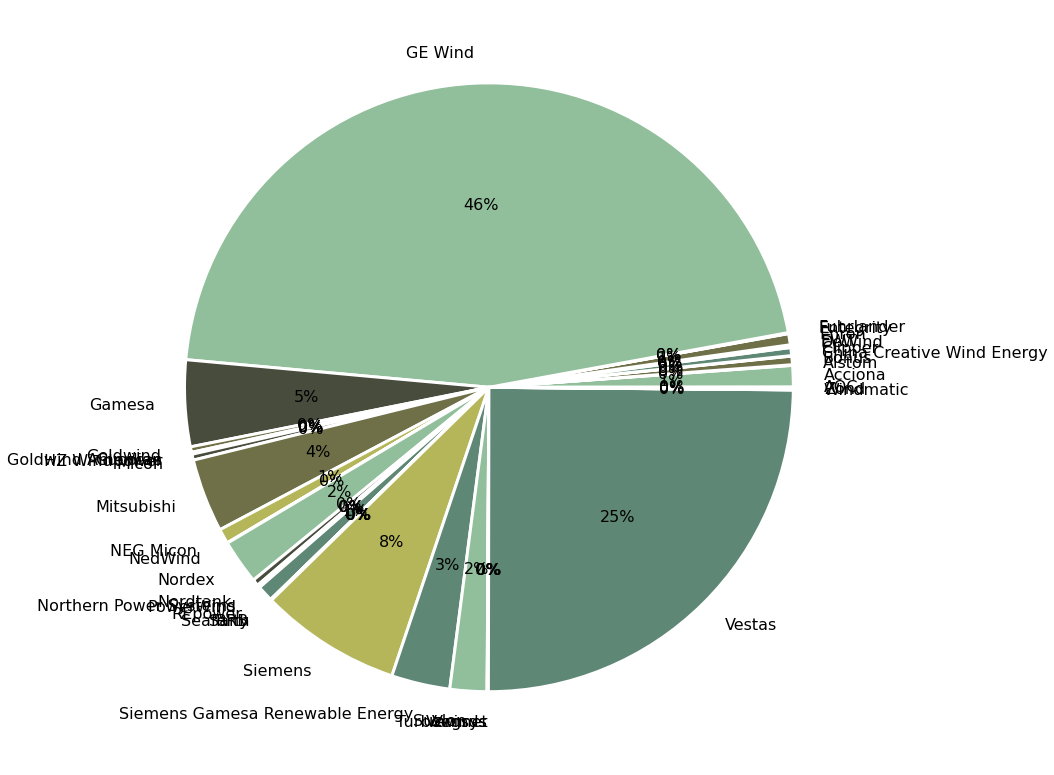

In [57]:
plt.figure(figsize=(14,14))
data = df_bymanu_piechart['case_id']
labels = df_bymanu_piechart['t_manu']

font = {'size' : 16}

plt.rc('font', **font)

#define Seaborn color palette to use
colors = ['#5e8775', '#91bf9b', '#484c3d', '#6f7048', '#b5b659']

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()